
# Project: TMDB Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> This data set contains information about 10,000 movies collected from The Movie Database (TMDb),It contains 10866 rows and 21 columns. This information includes user ratings and revenue. The independent variables for this analysis are Adjusted budget, Release_year, genres while the dependent variables are Popularity,profit.
>
## Questions
> 1. What Genre has the most movie produced?
> 2. What Genre is the most popular?
> 3. What is the correlation between Budget and Popularity?
> 4. What is the correlation between Budget and Profit?
> 5. What is the title of the most popular movie, it was released in which year and what genre is it?
> 6. What is the title of the least popular movie, it was released in which year and what genre is it?

In [1]:
#Import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.
## General Properties

In [2]:
# load dataset
df= pd.read_csv('tmdb-movies.csv')

#View loaded dataset
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Check for the number of rows and columns of the dataset
df.shape

(10866, 21)

In [4]:
#Check for duplicates
(df.duplicated().sum())

duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
#Dropping Duplicates found
df.drop_duplicates(inplace=True)

(df.duplicated().sum())

0

In [6]:
#get descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#Check for detailed info which includes the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [8]:
#dropping unneeded columns for this analysis
df.drop(['id','imdb_id','cast','homepage','tagline', 'keywords','overview','production_companies','release_date','vote_count','budget','revenue'],axis=1, inplace= True)
df.head()

,popularity,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
#Check Datatypes of columns needed for analysis
df.dtypes

popularity        float64
original_title     object
director           object
runtime             int64
genres             object
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [10]:
#change release year to date time
df['release_year']=pd.to_datetime(df['release_year'])

In [11]:
#Confirm Data types 
df.dtypes

popularity               float64
original_title            object
director                  object
runtime                    int64
genres                    object
vote_average             float64
release_year      datetime64[ns]
budget_adj               float64
revenue_adj              float64
dtype: object

> It is Observerved that some values of adjusted budget, adjusted revenue and runtime contains zeros, which can affect the accuracy of the analysis when checking for correlations using these columns, against replacing this values with mean i chose to first of replace this zeros with Nan then drop it along with any null values contained in the dataset. As replacing with mean could also affect the accuracy of calculations used in analysis.
>

In [12]:
## Removing 0's from budget, revenue and runtime columns
zeros_cols=['budget_adj', 'revenue_adj', 'runtime']
#replacing all the value from '0' to NAN in the columns with zeros
df[zeros_cols] = df[zeros_cols].replace(0, np.NAN)

In [13]:
#Check for null values
df.isnull().sum()

popularity           0
original_title       0
director            44
runtime             31
genres              23
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

In [14]:
#Drop null values
df.dropna(inplace=True)
df.isnull().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

> Noticed the genres columns have multiple genres. For example, Jurassic World has 5 genres which are action, adventure, science, fiction, and thriller.
We're going to take each multiple row and split them into five new rows - each with values for the different types of genres (values before and after the "|"), Let's separate them with five dataframes!
>

In [15]:
# Getting the movies with multiple genres
genre_cat = df[df['genres'].str.contains('|')] 
genre_cat

,popularity,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137.0,Action|Crime|Thriller,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,Mike Nichols,131.0,Drama,7.5,1970-01-01 00:00:00.000001966,5.038511e+07,2.266436e+08
10828,0.402730,Torn Curtain,Alfred Hitchcock,128.0,Mystery|Thriller,6.3,1970-01-01 00:00:00.000001966,2.015404e+07,8.733419e+07
10829,0.395668,El Dorado,Howard Hawks,120.0,Action|Western,6.9,1970-01-01 00:00:00.000001966,3.125892e+07,4.030809e+07
10835,0.299911,The Sand Pebbles,Robert Wise,182.0,Action|Adventure|Drama|War|Romance,7.0,1970-01-01 00:00:00.000001966,8.061618e+07,1.343603e+08


In [16]:
#creating copies of the genre categories
df1=genre_cat.copy()
df2=genre_cat.copy()
df3=genre_cat.copy()
df4=genre_cat.copy()
df5=genre_cat.copy()

In [17]:
# columns to split by "|"
split_columns = ['genres']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])
    df2[c] = df2[c].apply(lambda x: x.split("|")[0])
    df3[c] = df3[c].apply(lambda x: x.split("|")[0])
    df4[c] = df4[c].apply(lambda x: x.split("|")[0])
    df5[c] = df5[c].apply(lambda x: x.split("|")[0])

In [18]:
#this dataframes(df1,df2,df3,df4,df5) holds info for the different genres
#Combining dataframes to add to the original df
new_rows= df1.append([df2, df3,df4,df5])
new_rows

,popularity,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137.0,Action,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,0.670274,Who's Afraid of Virginia Woolf?,Mike Nichols,131.0,Drama,7.5,1970-01-01 00:00:00.000001966,5.038511e+07,2.266436e+08
10828,0.402730,Torn Curtain,Alfred Hitchcock,128.0,Mystery,6.3,1970-01-01 00:00:00.000001966,2.015404e+07,8.733419e+07
10829,0.395668,El Dorado,Howard Hawks,120.0,Action,6.9,1970-01-01 00:00:00.000001966,3.125892e+07,4.030809e+07
10835,0.299911,The Sand Pebbles,Robert Wise,182.0,Action,7.0,1970-01-01 00:00:00.000001966,8.061618e+07,1.343603e+08


In [19]:
#drop the original genres categories
df.drop(genre_cat.index,inplace=True)

#add in our newly seperated rows
df=df.append(new_rows,ignore_index=True)
df.head()

,popularity,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120.0,Action,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119.0,Adventure,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137.0,Action,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09


In [20]:
#create new column for the profit for each movie
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [21]:
#Check shape of the appended df
df.shape

(19265, 10)

In [22]:
#Statistical Summary of the appended df
df.describe()

,popularity,runtime,vote_average,budget_adj,revenue_adj,profit
count,19265.000000,19265.000000,19265.000000,1.926500e+04,1.926500e+04,1.926500e+04
mean,1.191825,109.208928,6.168258,4.425038e+07,1.370974e+08,9.284700e+07
std,1.475105,19.910845,0.794919,4.480578e+07,2.161074e+08,1.940716e+08
min,0.001117,15.000000,2.200000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.462609,95.000000,5.700000,1.309053e+07,1.840420e+07,-1.505554e+06
50%,0.797723,106.000000,6.200000,3.001664e+07,6.174274e+07,2.737578e+07
75%,1.368403,119.000000,6.700000,6.061307e+07,1.632752e+08,1.074943e+08
max,32.985763,338.000000,8.400000,4.250000e+08,2.827124e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Let's explore the clean and suitable dataset which is now ready for analysis!



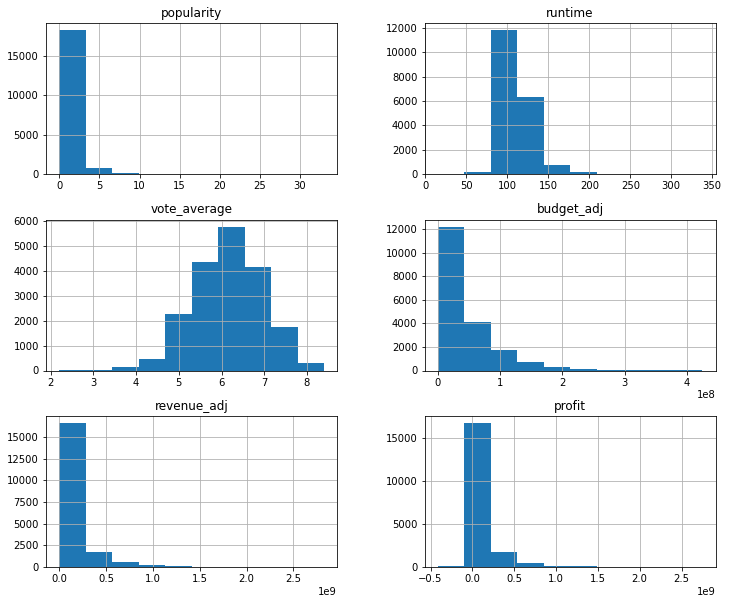

In [23]:
#Basic Exploration
df.hist(figsize=[12, 10]);

>OBSERVATIONS:
Popularity, Adjusted Revenue,Adjusted Budget,and profit are skewed to the right
>

## Research Question 1: Which Genre has the most Movies? And is the same genre the most popular?

In [24]:
#Get Number of unique genres
df.genres.nunique()

19

In [1]:
#Horizontal Bar Chart displaying the distribution of genres
gen_count = df['genres'].value_counts()
gen_count.plot(kind='bar');
plt.title("Distribution of Genres by count",fontsize=15)
plt.xlabel('Count of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13);


NameError: name 'df' is not defined

> From this we can say that Drama, Comedy and Action have the most number of movies in this data set

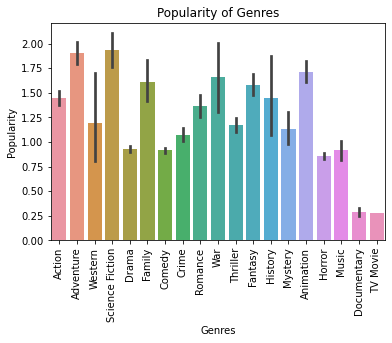

In [26]:
#barplot displaying popularity of genres
gen_pop = sns.barplot(x='genres', y='popularity', data=df )
gen_pop.set_xticklabels(gen_pop.get_xticklabels(), rotation=90)
ax = plt.gca()
ax.set_title('Popularity of Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity');

> Science fiction genre is the average most popular genre, therefore the genre with the most number of movies in the dataset doesnt have the most popularity.

## Research Question 2 Does Budget have effect on Popularity?

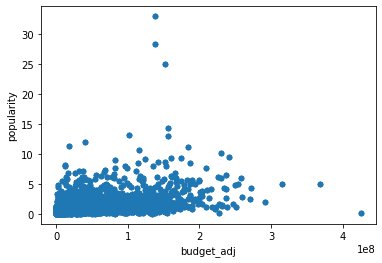

In [27]:
#Scatter plot to show relationship between budget and popularity
df.plot(x='budget_adj',y='popularity', kind='scatter');

> Positively Correlated clusters with outliers

## Research Question 3 Does budget have effect on Profit?

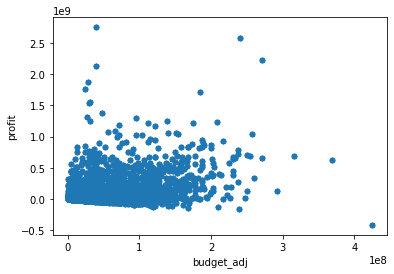

In [28]:
#Scatter plot to show relationship between budget and profit
df.plot(x='budget_adj',y='profit', kind='scatter');

> Positively Correlated clusters with outliers

## Research Question 4: The Most popular Movie and which year was it released?

In [29]:
#Using idxmax to get overall details of the most popular movie
idx=df.popularity.idxmax()
df.loc[idx]

popularity                              32.9858
original_title                   Jurassic World
director                        Colin Trevorrow
runtime                                     124
genres                                   Action
vote_average                                6.5
release_year      1970-01-01 00:00:00.000002015
budget_adj                             1.38e+08
revenue_adj                         1.39245e+09
profit                              1.25445e+09
Name: 0, dtype: object

> Jurassic World  an action movie has the most popularity and it was released in the year 2015.

## Research Question 5: The least popular Movie and which year was it released?

In [30]:
#Using idxmin to get overall details of the least popular movie
idxmi=df.popularity.idxmin()
df.loc[idxmi]

popularity                             0.001117
original_title               Born into Brothels
director              Zana Briski|Ross Kauffman
runtime                                      85
genres                              Documentary
vote_average                                6.4
release_year      1970-01-01 00:00:00.000002004
budget_adj                               404056
revenue_adj                         4.05795e+06
profit                              3.65389e+06
Name: 2555, dtype: object

> Born into Brothels a documentsry has the least popularity and it was Released in the year 2004.

<a id='conclusions'></a>
## Conclusions

Summary: 

>Drama, Comedy and Action are the top 3 most produced genres.
>
>The most produced genre does not equate the most popular genre.
>
>Budget most of the time affects the popularity and profit to be realised from the movie production.
>
>Release Year does not have effect on the popularity of a movie.
>
Limitations:
>
> Dropped null rows effect on the analysis makes the analysis not 100% reliable
>
>Genre of movies may not be accurate